In [39]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import csv
import pandas as pd
from colorama import Fore,Style
np.set_printoptions(precision=3, suppress=True)


In [40]:
file_path = 'supermarket_sales_vn.csv'

row_list = []
with open (file_path, newline='', encoding='utf8') as input_file:
	data_file =  csv.reader(input_file, delimiter=',')
	header = next(data_file)
	for row in data_file:
		row_list.append(row)


In [41]:
print(len(row_list))
print(np.shape(row_list))
row_list = np.array(row_list)
# print(row_list.T[0])
print(type(row_list.T[5][0]))

1000
(1000, 14)
<class 'numpy.str_'>


In [42]:
with open('DataScience01_Bai1_2.5_NguyenBuiHoangLong.txt','w',encoding='utf8') as file:
    file.write(f"Số lượng hàng - cột tương ứng là: {np.shape(row_list)}\n")
    file.write(f"Số lượng dòng của tập dữ liệu là:{len(row_list)}\n")
    file.write("Tên\t - Ý nghĩa\t - Loại dữ liệu\n")
    file.write("\tInvoice ID - Mã hóa đơn phiếu bán hàng - str type\n")
    file.write("\tCity - Thành phố - str type\n")
    file.write('\tCustormer - Phân loại nhóm khách hàng - str type\n')
    file.write('\tGender - Giới tính - str type\n')
    file.write('\tProduct line - Nhóm sản phẩm - str type\n')
    file.write('\tUnit price - Giá của mỗi sản phẩm - float type\n')
    file.write('\tQuantity - Số lượng sản phẩm bán ra - int type\n')
    file.write('\tTax 5% - Thuế phí cho khách hàng mua - float type\n')
    file.write('\tTotal - Tổng giá bao gồm thuế - float type\n')
    file.write('\tDate - Ngày bán ra sản phẩm - str type\n')
    file.write('\tTime - Giờ bán ra sản phẩm - str type\n')
    file.write('\tPayment - Hình thức chi trả - str type\n')
    file.write('\tcogs - Giá vốn mặt hành - float type\n')
    file.write('\tRating - Đánh giá sản phẩm - float type\n')

# $\color{red}{\text{BÀI 3}}$



# Về giá

In [43]:
# min, max, range, mean, meadian, mode (nếu có), var, std, quantiles, 95% CI,
price_list = np.array([float(row[5]) for row in row_list])
print(price_list[0:10])

[74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84]


min price: 10.08
max price: 99.96
mean price: 55.67213
median price: 55.230000000000004
mode price: 99.51059999999998
var of price list: 701.2633659631
std of price list: 26.481377720260326
quantile of price list: [32.875 55.23  77.935]
95% CI of price: (54.03000609672037, 57.314253903279635)


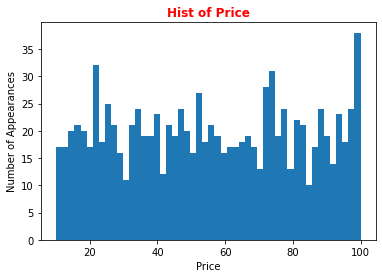

In [44]:
min_price = np.min(price_list)
print('min price:',min_price)
max_price = np.max(price_list)
print('max price:',max_price)
mean_price = np.mean(price_list)
print('mean price:',mean_price)
med_price = np.median(price_list)
print('median price:',med_price)
hist_price, bins_price = np.histogram(price_list,bins=100)
mode_idx = np.argmax(hist_price)
mode_price = np.mean([bins_price[mode_idx],bins_price[mode_idx+1]])
print('mode price:',mode_price)
var_price = np.var(price_list)
print('var of price list:',var_price)
std_price = np.std(price_list)
print('std of price list:',std_price)
quantiles_price = np.quantile(price_list,[0.25,0.5,0.75])
print('quantile of price list:', quantiles_price)
CI_95 = stats.norm.interval(alpha=0.95, loc=np.mean(price_list), scale=stats.sem(price_list))
print('95% CI of price:',CI_95)
fig,ax =  plt.subplots(figsize=(6,4))
ax.hist(price_list,bins=50)
ax.set_title('Hist of Price',weight='bold',color='r')
ax.set_xlabel('Price')
ax.set_ylabel('Number of Appearances')
plt.show()

[12.  28.3]


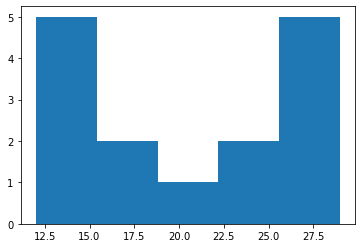

In [45]:
import numpy as np
import scipy.stats as st

#define sample data
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
print(np.quantile(data,[0.05,0.95]))
plt.hist(data,bins=5)
plt.show()

# Số lượng đơn

In [46]:
quantity_list = []
quantity_list = [row[6] for row in row_list]

In [47]:
quantity_list = pd.Series(data=quantity_list, dtype='int',name='Quantity basic EDA')
quantity_list.describe()

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity basic EDA, dtype: float64

In [48]:
stats.mode(quantity_list.values)

ModeResult(mode=array([10]), count=array([119]))

In [49]:
np.median(quantity_list.values)

5.0

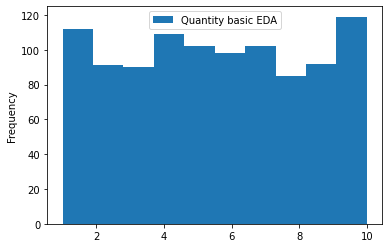

95% CI of quantity: (5.32858743340383, 5.69141256659617)


In [50]:
quantity_list.plot(kind='hist',bins=10)
plt.legend()
plt.show()

CI_95_quantity = stats.t.interval(alpha = 0.95, df=len(quantity_list.values)-1,
                                  loc=np.mean(quantity_list.values), scale=stats.sem(quantity_list.values))
print('95% CI of quantity:', CI_95_quantity)

# Tổng đơn

In [51]:
total_list = [row[8] for row in row_list]
total_list = pd.Series(data=total_list,name='Total basic EDA',dtype='float')
total_list.describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total basic EDA, dtype: float64

In [52]:
stats.mode(total_list.values)

ModeResult(mode=array([87.234]), count=array([2]))

In [53]:
total_listm = [float(row[8]) for row in row_list]
hist_total, bins_total = np.histogram(total_listm,bins=100)
mode_idx = np.argmax(hist_total)
mode_total = np.mean([bins_total[mode_idx],bins_total[mode_idx+1]])
print('mode total:',mode_total)
print('variance of total',np.var(total_list.values))

mode total: 77.7566475
variance of total 60399.138419699506


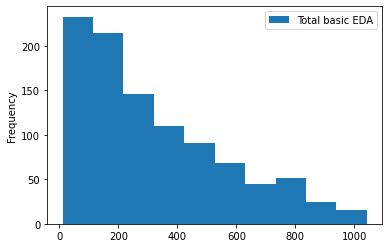

95% CI of total


(307.7084118264187, 338.2250861735813)

In [54]:
total_list.plot(kind='hist')
plt.legend()
plt.show()

data = total_list.values
print('95% CI of total')
stats.t.interval(alpha=0.95, df=len(data)-1,loc=np.mean(data), scale=st.sem(data)) 

# Tax

In [55]:
tax = [row[7] for row in row_list]
tax = pd.Series(data=tax,name='Tax basic EDA',dtype='float')
tax.describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax basic EDA, dtype: float64

In [56]:
stats.mode(tax.values)

ModeResult(mode=array([4.154]), count=array([2]))

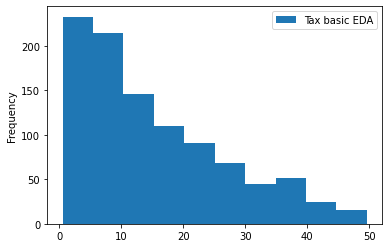

95% CI of tax (14.652781515543747, 16.10595648445625)
median of tax 12.088000000000001


In [57]:
tax.plot(kind='hist')
plt.legend()
plt.show()
data = tax.values
CI_95_tax = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 
print('95% CI of tax',CI_95_tax)
print('median of tax',np.median(tax.values))

# cogs

In [58]:
cogs = [row[12] for row in row_list]
cogs = pd.Series(data=cogs,name='cogs basic EDA',dtype='float')
cogs.describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs basic EDA, dtype: float64

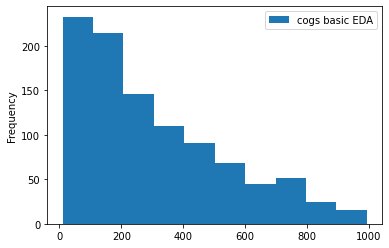

mode of cogs: ModeResult(mode=array([83.08]), count=array([2]))
variance of cogs 54783.7990201356
95% CI of cogs (293.05563031087496, 322.11912968912503)
median of cogs 241.76


In [59]:
cogs.plot(kind='hist')
plt.legend()
plt.show()
data = cogs.values
print('mode of cogs:',stats.mode(data))
print('variance of cogs',np.var(data))
mode_cogs = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 
print('95% CI of cogs',mode_cogs)
print('median of cogs',np.median(cogs))

# rating

In [60]:
rating = [row[13] for row in row_list]
rating = pd.Series(data=rating, name='Rating basic EDA',dtype='float')
rating.describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating basic EDA, dtype: float64

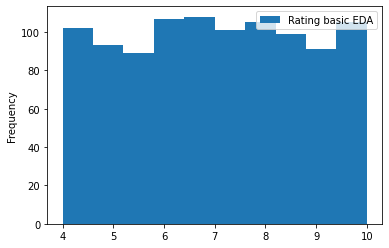

Mode of rating: 6.7
Variance of rating 2.95056471
95% CI of rating: (6.8660540400823775, 7.079345959917622)
median of rating 7.0


In [61]:
rating.plot(kind='hist')
plt.legend()
plt.show()

data = rating.values
freq,bins = np.histogram(data)
idx = np.argmax(freq)
mode_rating = np.mean([bins[idx],bins[idx+1]])
print('Mode of rating:',mode_rating)
print('Variance of rating',np.var(data))
CI_95_rating = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data) )
print('95% CI of rating:',CI_95_rating)
print('median of rating',np.median(rating))

#  $\color{red}{\text{BÀI 4}}$

# Theo chi nhánh

In [62]:
quantity_HCM = pd.Series(data=[row[6] for row in row_list if row[1]=='TP HCM'],dtype='int',name='Đơn hàng HCM')
quantity_HN = pd.Series(data=[row[6] for row in row_list if row[1]=='Hà Nội'], dtype='int', name='Đơn hàng Hà Nội')

In [63]:
print("Tổng đơn hàng HCM:",np.sum(quantity_HCM.values))
print("Tổng đơn hàng Hà Nội",np.sum(quantity_HN.values))

Tổng đơn hàng HCM: 2758
Tổng đơn hàng Hà Nội 1460


In [64]:
sum_quantity_HCM = np.sum(quantity_HCM.values)
sum_quantity_HN = np.sum(quantity_HN.values)
quantity_chinhanh = pd.Series(data=[sum_quantity_HCM,sum_quantity_HN],name='Tổng đơn hàng theo chi nhánh')

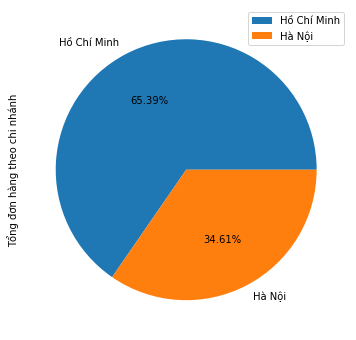

In [65]:
quantity_chinhanh.plot(kind='pie',figsize=(6,6), labels=['Hồ Chí Minh','Hà Nội'],autopct='%.2f%%')
plt.legend()
plt.show()

# Theo giới tính

In [66]:
quantity_nam = pd.Series(data=[row[6] for row in row_list if row[3]=='Nam'],dtype=int)
quantity_nu = pd.Series(data=[row[6] for row in row_list if row[3]=='Nữ'],dtype=int)

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [67]:
sum_quantity_nam = np.sum(quantity_nam.values)
sum_quantity_nu = np.sum(quantity_nu.values)

print('Tổng đơn hàng của nam:',sum_quantity_nam)
print('Tổng đơn hàng của nữ',sum_quantity_nu)

Tổng đơn hàng của nam: 2641
Tổng đơn hàng của nữ 2869


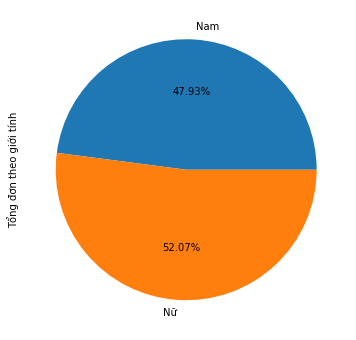

In [68]:
quantity_gioitinh = pd.Series(data=[sum_quantity_nam,sum_quantity_nu],dtype=int,name='Tổng đơn theo giới tính')
quantity_gioitinh.plot(kind='pie',labels=['Nam','Nữ'],autopct='%.2f%%',figsize=(6,6))
plt.show()

# Theo loại sản phẩm

In [69]:
loai_san_pham = np.unique([row[4] for row in row_list])

In [70]:
list_sp = []
for idx,name in enumerate(loai_san_pham):
    name = []
    list_sp.append(name)

In [71]:
print(list_sp)

[[], [], [], [], [], []]


In [72]:
for idx,name in enumerate(loai_san_pham):
    list_sp[idx].append([int(row[6]) for row in row_list if row [4] == name])

In [73]:
quantity_theo_sp = []
for idx,name in enumerate(loai_san_pham):
    quantity_theo_sp.append(np.sum(list_sp[idx]))

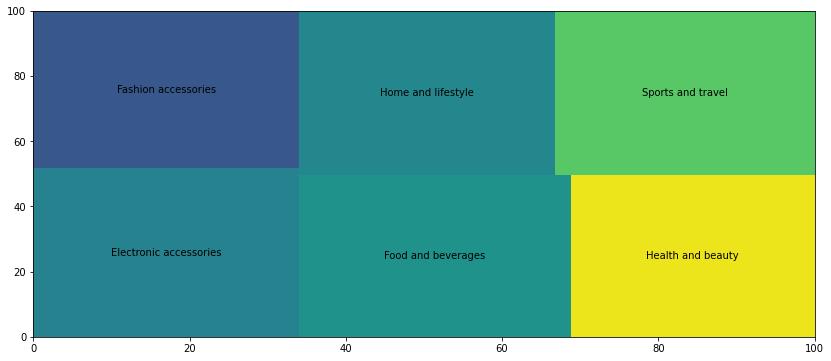

In [74]:
import squarify
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
squarify.plot(sizes=quantity_theo_sp,label=loai_san_pham,ax=ax)
plt.show()

#  $\color{red}{\text{BÀI 5: Đa biến (kết hợp các cột dữ liệu định danh và liên tục):}}$

#  $\color{red}{\text{a)Thực hiện lại câu hỏi thứ 3 cho từng chi nhánh, giới tính, phân loại khách hàng}}$

# Theo phân loại khách hàng

In [75]:
def basic_EDA(idx_row):
    EDA_type = [row[idx_row] for row in row_list]
    type_EDA, counts_EDA = np.unique(EDA_type,return_counts=True)
    
    quantity_EDA = []
    total_EDA = []
    rating_EDA = []
    cogs_EDA = []
    price_EDA = []
    tax_EDA = []
    
    for idx,name in enumerate(type_EDA):
        name = []
        quantity_EDA.append(name)
        total_EDA.append(name)
        rating_EDA.append(name)
        cogs_EDA.append(name)
        price_EDA.append(name)
        tax_EDA.append(name)
        
    for idx,name in enumerate(type_EDA):
        quantity_EDA[idx].append([int(row[6]) for row in row_list if row[idx_row]==name])
        total_EDA[idx].append([float(row[8]) for row in row_list if row[idx_row]==name])
        rating_EDA[idx].append([float(row[13]) for row in row_list if row[idx_row]==name])
        cogs_EDA[idx].append([float(row[12]) for row in row_list if row[idx_row]==name])
        price_EDA[idx].append([float(row[5]) for row in row_list if row[idx_row]==name])
        tax_EDA[idx].append([float(row[7]) for row in row_list if row[idx_row]==name])
        
    for idx,name in enumerate(type_EDA):
        print(Fore.RED + f"~~~~~~~~~~~~~~~~~~~~~~~~~~~{name}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print(Style.RESET_ALL)
        quantity_EDA_pd = pd.Series(data=quantity_EDA[idx][0],name=f'Quantity {name}')
        total_EDA_pd = pd.Series(data=total_EDA[idx][0],name=f'Total {name}')
        rating_EDA_pd = pd.Series(data=rating_EDA[idx][0],name=f'Rating {name}')
        cogs_EDA_pd = pd.Series(data=cogs_EDA[idx][0],name=f'Cogs {name}')
        price_EDA_pd = pd.Series(data=cogs_EDA[idx][0],name=f'Price {name}')
        tax_EDA_pd = pd.Series(data=cogs_EDA[idx][0],name=f'Price {name}')
        
        Q,T,R = quantity_EDA_pd.describe(), total_EDA_pd.describe(), rating_EDA_pd.describe()
        C,P,Tx = cogs_EDA_pd.describe(), price_EDA_pd.describe(), tax_EDA_pd.describe()
        
        print(f"{Q}\n")
        quantity_EDA_pd.plot(kind='hist')
        plt.legend()
        plt.show()
        print(T,'\n')
        total_EDA_pd.plot(kind='hist',color='green')
        plt.legend()
        plt.show()
        print(R,'\n')
        rating_EDA_pd.plot(kind='hist',color='tomato')
        plt.legend()
        plt.show()
        print(C,'\n')
        cogs_EDA_pd.plot(kind='hist',color='yellow')
        plt.legend()
        plt.show()
        print(P,'\n')
        price_EDA_pd.plot(kind='hist',color='lime')
        plt.legend()
        plt.show()
        print(Tx,'\n')
        price_EDA_pd.plot(kind='hist',color='lime')
        plt.legend()
        plt.show()
        
        print(Fore.BLUE+'\n*****************************************************************************************************\n')
        print(Style.RESET_ALL)

~~~~~~~~~~~~~~~~~~~~~~~~~~~Member~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    501.000000
mean       5.558882
std        2.961592
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Quantity Member, dtype: float64



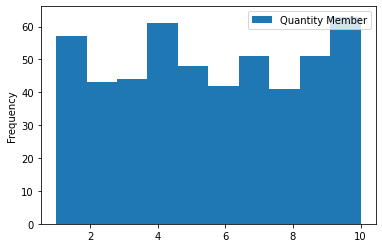

count    501.000000
mean       5.558882
std        2.961592
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Total Member, dtype: float64 



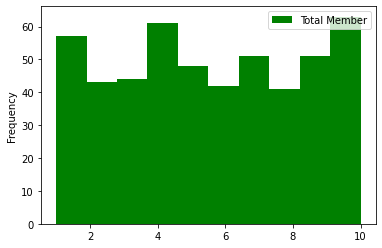

count    501.000000
mean       5.558882
std        2.961592
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Rating Member, dtype: float64 



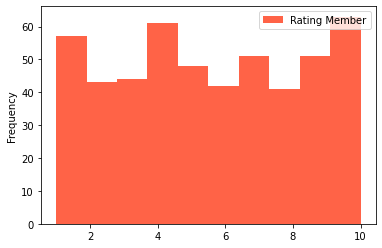

count    501.000000
mean       5.558882
std        2.961592
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Cogs Member, dtype: float64 



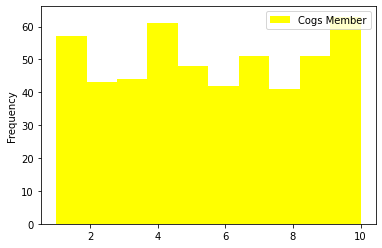

count    501.000000
mean       5.558882
std        2.961592
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Member, dtype: float64 



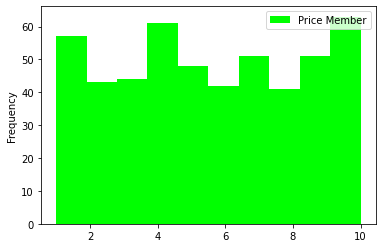

count    501.000000
mean       5.558882
std        2.961592
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Member, dtype: float64 



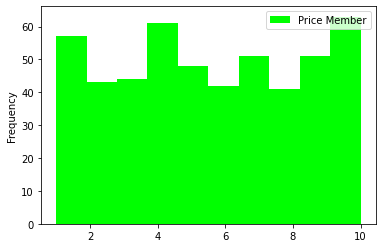


*****************************************************************************************************


~~~~~~~~~~~~~~~~~~~~~~~~~~~Normal~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    499.000000
mean       5.460922
std        2.886747
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Quantity Normal, dtype: float64



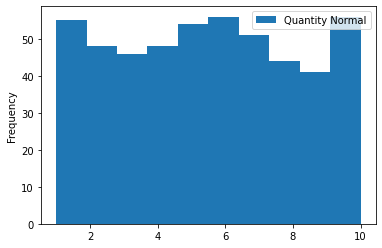

count    499.000000
mean       5.460922
std        2.886747
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Total Normal, dtype: float64 



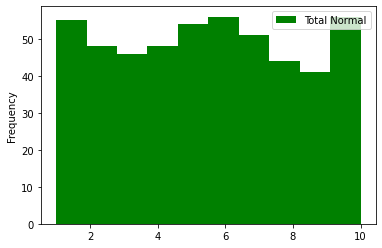

count    499.000000
mean       5.460922
std        2.886747
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Rating Normal, dtype: float64 



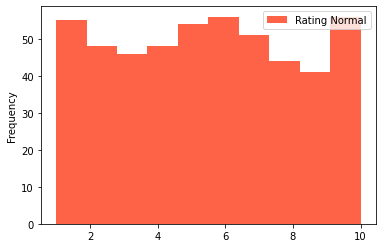

count    499.000000
mean       5.460922
std        2.886747
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Cogs Normal, dtype: float64 



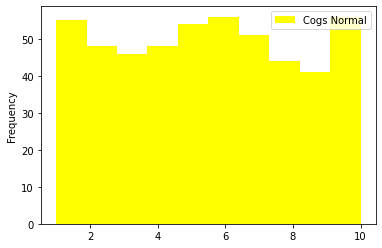

count    499.000000
mean       5.460922
std        2.886747
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Normal, dtype: float64 



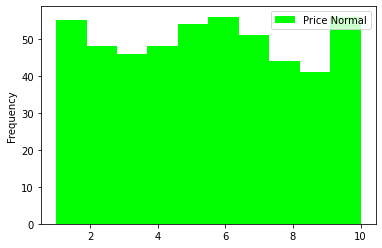

count    499.000000
mean       5.460922
std        2.886747
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Normal, dtype: float64 



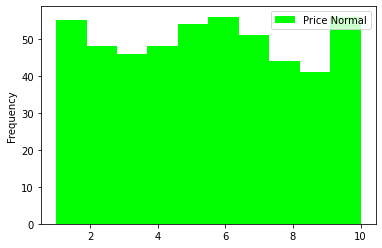


*****************************************************************************************************




In [76]:
basic_EDA(2)

# Theo chi nhánh

~~~~~~~~~~~~~~~~~~~~~~~~~~~Hà Nội~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    274.000000
mean       5.328467
std        2.839051
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Quantity Hà Nội, dtype: float64



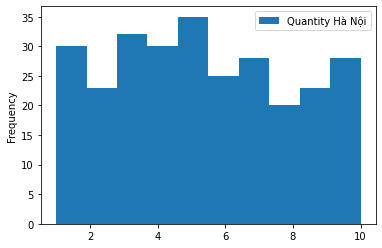

count    274.000000
mean       5.328467
std        2.839051
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Total Hà Nội, dtype: float64 



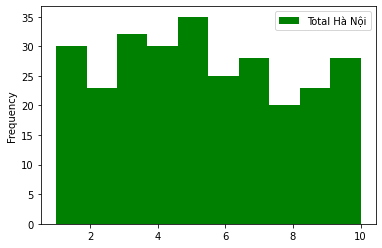

count    274.000000
mean       5.328467
std        2.839051
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Rating Hà Nội, dtype: float64 



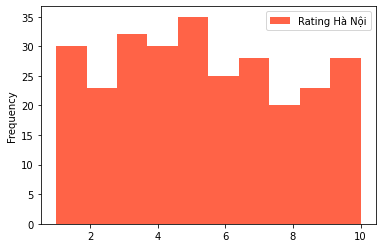

count    274.000000
mean       5.328467
std        2.839051
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Cogs Hà Nội, dtype: float64 



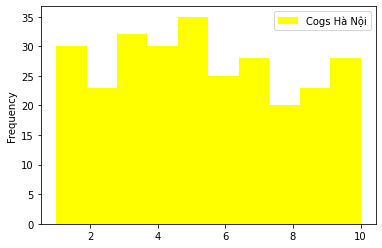

count    274.000000
mean       5.328467
std        2.839051
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Hà Nội, dtype: float64 



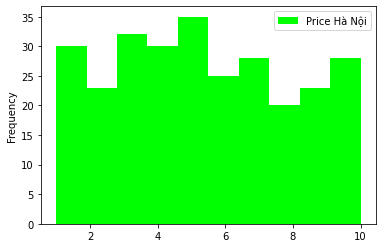

count    274.000000
mean       5.328467
std        2.839051
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Hà Nội, dtype: float64 



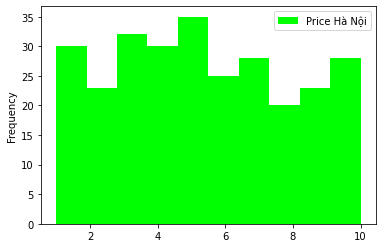


*****************************************************************************************************


~~~~~~~~~~~~~~~~~~~~~~~~~~~TP HCM~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    490.000000
mean       5.628571
std        2.950304
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Quantity TP HCM, dtype: float64



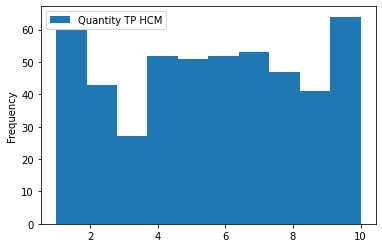

count    490.000000
mean       5.628571
std        2.950304
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Total TP HCM, dtype: float64 



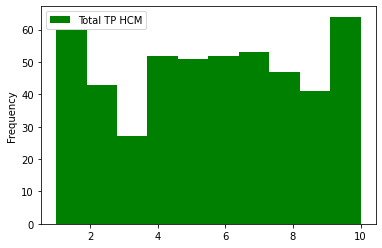

count    490.000000
mean       5.628571
std        2.950304
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Rating TP HCM, dtype: float64 



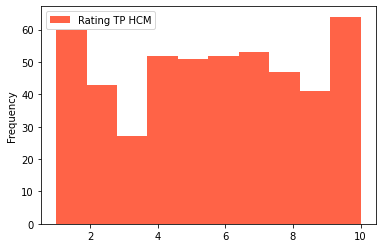

count    490.000000
mean       5.628571
std        2.950304
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Cogs TP HCM, dtype: float64 



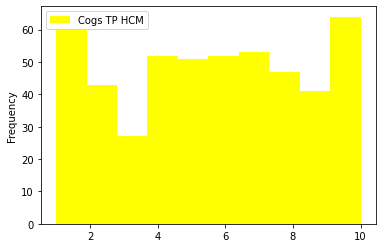

count    490.000000
mean       5.628571
std        2.950304
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Price TP HCM, dtype: float64 



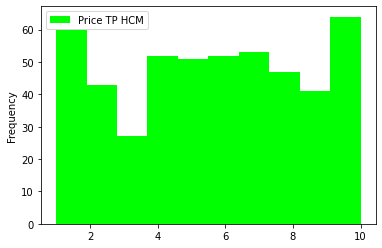

count    490.000000
mean       5.628571
std        2.950304
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Price TP HCM, dtype: float64 



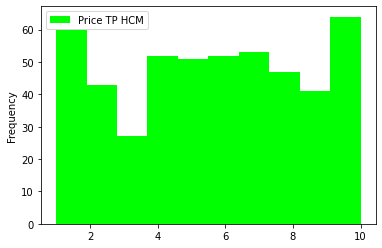


*****************************************************************************************************


~~~~~~~~~~~~~~~~~~~~~~~~~~~Đà Nẵng~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    236.000000
mean       5.474576
std        2.964217
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Quantity Đà Nẵng, dtype: float64



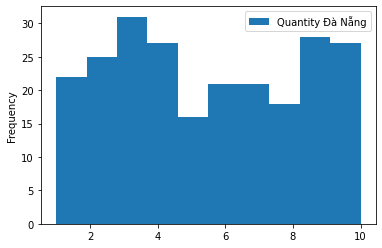

count    236.000000
mean       5.474576
std        2.964217
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Total Đà Nẵng, dtype: float64 



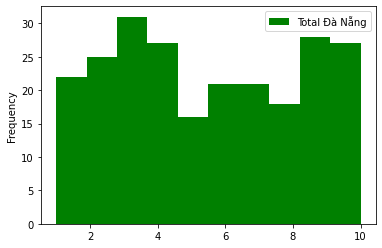

count    236.000000
mean       5.474576
std        2.964217
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Rating Đà Nẵng, dtype: float64 



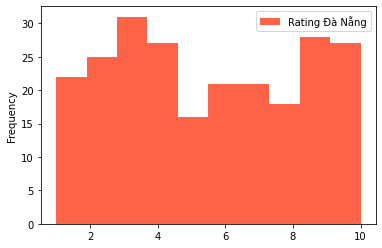

count    236.000000
mean       5.474576
std        2.964217
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Cogs Đà Nẵng, dtype: float64 



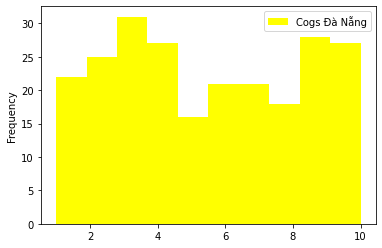

count    236.000000
mean       5.474576
std        2.964217
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Đà Nẵng, dtype: float64 



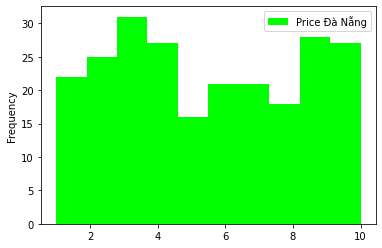

count    236.000000
mean       5.474576
std        2.964217
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Đà Nẵng, dtype: float64 



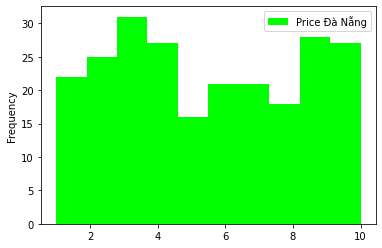


*****************************************************************************************************




In [77]:
basic_EDA(1)

# Theo giới tính

~~~~~~~~~~~~~~~~~~~~~~~~~~~Nam~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    499.000000
mean       5.292585
std        2.947084
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Quantity Nam, dtype: float64



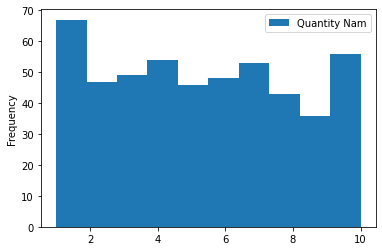

count    499.000000
mean       5.292585
std        2.947084
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Total Nam, dtype: float64 



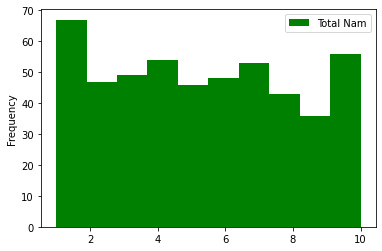

count    499.000000
mean       5.292585
std        2.947084
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Rating Nam, dtype: float64 



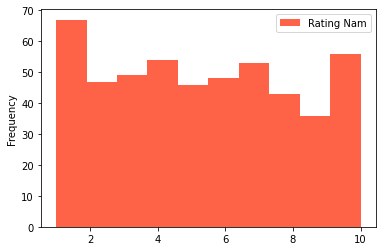

count    499.000000
mean       5.292585
std        2.947084
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Cogs Nam, dtype: float64 



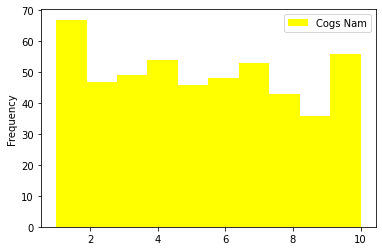

count    499.000000
mean       5.292585
std        2.947084
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Nam, dtype: float64 



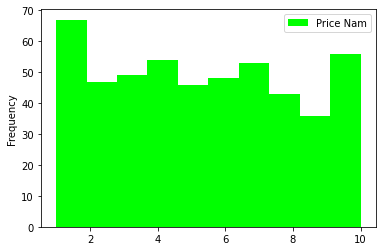

count    499.000000
mean       5.292585
std        2.947084
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Price Nam, dtype: float64 



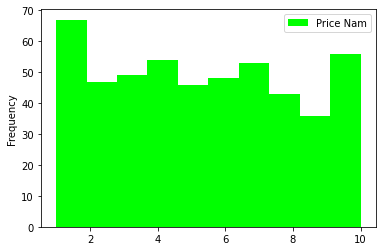


*****************************************************************************************************


~~~~~~~~~~~~~~~~~~~~~~~~~~~Nữ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

count    501.000000
mean       5.726547
std        2.886360
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Quantity Nữ, dtype: float64



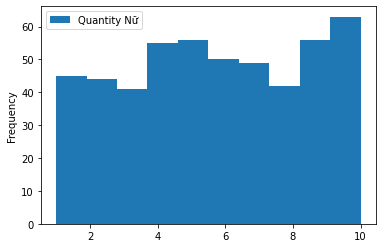

count    501.000000
mean       5.726547
std        2.886360
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Total Nữ, dtype: float64 



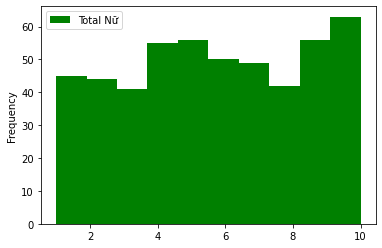

count    501.000000
mean       5.726547
std        2.886360
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Rating Nữ, dtype: float64 



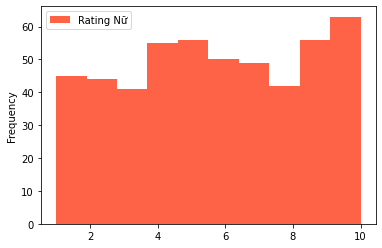

count    501.000000
mean       5.726547
std        2.886360
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Cogs Nữ, dtype: float64 



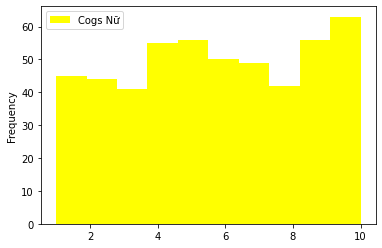

count    501.000000
mean       5.726547
std        2.886360
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Price Nữ, dtype: float64 



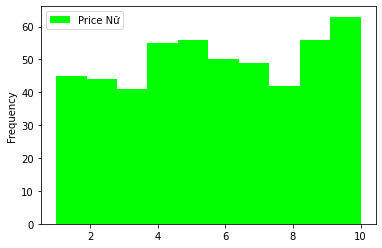

count    501.000000
mean       5.726547
std        2.886360
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Price Nữ, dtype: float64 



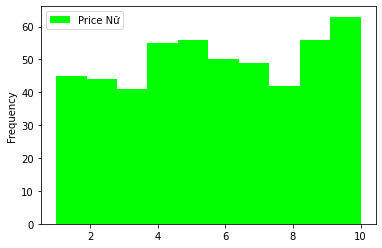


*****************************************************************************************************




In [78]:
basic_EDA(3)

#  $\color{red}{\text{b)So sánh tổng đơn theo phân loại sản phẩm}}$

In [79]:
loai_sp_list = [row[4] for row in row_list]
loai_sp, counts_sp = np.unique(loai_sp_list,return_counts=True)
loai_sp, counts_sp

(array(['Electronic accessories', 'Fashion accessories',
        'Food and beverages', 'Health and beauty', 'Home and lifestyle',
        'Sports and travel'], dtype='<U22'),
 array([170, 178, 174, 152, 160, 166], dtype=int64))

In [80]:
list_sp_theo_loai = []
for idx,name in enumerate(loai_sp):
    name = []
    list_sp_theo_loai.append(name)
list_sp_theo_loai

[[], [], [], [], [], []]

In [81]:
for idx,name in enumerate(loai_sp):
    list_sp_theo_loai[idx].append([float(row[8]) for row in row_list if row[4] == name])
list_sp_theo_loai

[[[80.22,
   627.6165,
   433.692,
   107.142,
   246.4875,
   451.71,
   181.44,
   575.316,
   394.632,
   119.259,
   722.232,
   192.843,
   478.233,
   437.325,
   102.018,
   78.435,
   218.0115,
   931.035,
   860.685,
   836.304,
   550.935,
   138.1275,
   75.7785,
   175.14,
   333.207,
   171.7275,
   241.458,
   451.3635,
   629.8425,
   942.4485,
   247.8735,
   298.116,
   285.705,
   62.0025,
   155.652,
   571.41,
   33.3585,
   69.405,
   256.41,
   326.424,
   69.6675,
   135.45,
   276.948,
   709.317,
   423.15,
   204.6975,
   65.604,
   272.58,
   121.128,
   214.998,
   125.664,
   530.67,
   83.412,
   820.365,
   392.6475,
   152.712,
   149.3625,
   150.0975,
   151.4835,
   75.5475,
   191.247,
   379.9215,
   31.752,
   86.625,
   484.974,
   203.175,
   193.011,
   99.33,
   55.881,
   80.661,
   181.818,
   185.367,
   264.7575,
   147.798,
   343.224,
   470.673,
   138.663,
   87.234,
   833.595,
   488.985,
   103.782,
   338.31,
   353.094,
   40.53,
 

In [82]:
np.shape(list_sp_theo_loai)

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(6, 1)

In [83]:
sum_tongdon_theo_loai_sp = []
for idx in range(len(loai_sp)):
    sum_tongdon_theo_loai_sp.append(np.sum(list_sp_theo_loai[idx][0]))
sum_tongdon_theo_loai_sp = pd.Series(data= sum_tongdon_theo_loai_sp, dtype=float,name='Tổng đơn theo loại sản phẩm',index=loai_sp)

In [84]:
sum_tongdon_theo_loai_sp

Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Tổng đơn theo loại sản phẩm, dtype: float64

In [85]:
sum_tongdon_theo_loai_sp.describe()

count        6.000000
mean     53827.791500
std       2408.728819
min      49193.739000
25%      53972.908500
50%      54321.713250
75%      54926.502750
max      56144.844000
Name: Tổng đơn theo loại sản phẩm, dtype: float64

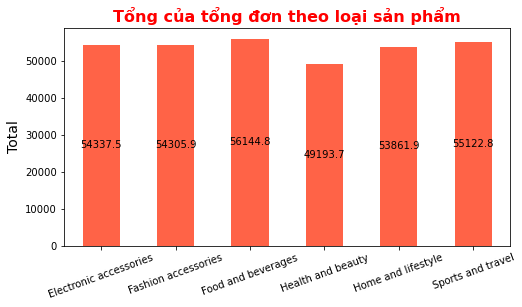

In [86]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sum_tongdon_theo_loai_sp.plot(ax=ax,kind='bar',rot=20,color='tomato')
ax.bar_label(container = ax.containers[0],label_type='center')
ax.set_ylabel('Total',fontsize=14)
ax.set_title('Tổng của tổng đơn theo loại sản phẩm',fontsize=16,weight='bold',color='r')
plt.show()

In [87]:
file = pd.read_csv('supermarket_sales_vn.csv')
file.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3


In [88]:
file[['Product line','Total']].groupby('Product line').sum()

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265
